In [4]:
import altair as alt

In [5]:
import pandas as pd

In [6]:
my_data = pd.read_csv('combinded_suspicious.csv')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [7]:
my_data.head()


,Source,Etype,Destination,TimeStamp,Source_Names,Destination_Names,full_date,month_day_yr,month_yr,month,yr
0,857138,calls,1108217,1446616923,Richard Fox,Lindsy Henion,2015-11-04 06:02:03,11/04/2015,11/2015,11,2015
1,857138,calls,1690582,1446625263,Richard Fox,Meryl Pastuch,2015-11-04 08:21:03,11/04/2015,11/2015,11,2015
2,1039322,calls,387200,1446742253,Dylan Ballard,Augusta Sharp,2015-11-05 16:50:53,11/05/2015,11/2015,11,2015
3,28520,calls,1886447,1446752753,Refugio Orrantia,Julie Tierno,2015-11-05 19:45:53,11/05/2015,11/2015,11,2015
4,728286,calls,696047,1446798233,Kerstin Belveal,Jose Ringwald,2015-11-06 08:23:53,11/06/2015,11/2015,11,2015



0 is for calls
1 is for emails
2 is for purchases
3 is for meetings


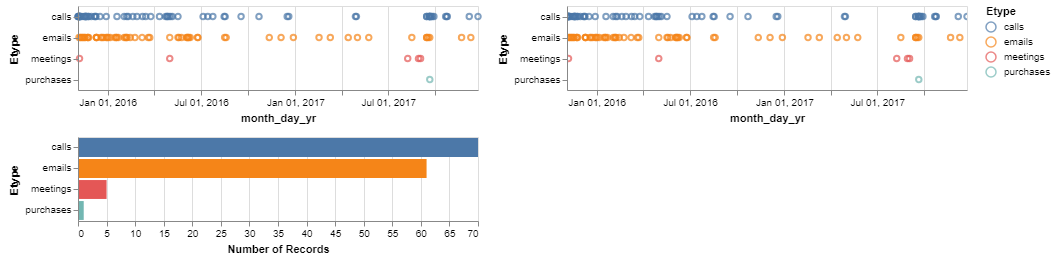

In [10]:
interval = alt.selection_interval(encodings=['x'])
chart1 = alt.Chart(my_data).mark_point().encode(
    x='month_day_yr:T',
    y='Etype:N',
    color=alt.condition(interval,'Etype:N',alt.value('lightgray')),
    tooltip=['Source_Names','Destination_Names']
).interactive().properties(selection=interval)

chart2 = alt.Chart(my_data).mark_point().encode(
    x='month_day_yr:T',
    y='Etype:N',
    color=alt.condition(interval,'Etype:N',alt.value('lightgray')),
    tooltip=['Source_Names','Destination_Names']
).interactive().transform_filter(interval)


hist = alt.Chart(my_data).mark_bar().encode(
    x='count()',
    y='Etype:N',
    color='Etype:N'
).transform_filter(
    interval
)

(chart1 | chart2) & hist

In [11]:
alt.data_transformers.enable('default')
((chart1 | chart2) & hist).save('vast_data.html')

In [12]:
purchase_data = pd.read_csv('purchase_detail.csv')

In [42]:
purchase_data.head()

,Unnamed: 0,Destination,Purchase_Count,Destination_Names
0,458,2037791,1,Brett Higgins
1,146,2037741,1,Justin Harvey
2,147,2037815,1,Winnie Klein
3,324,2037873,1,Danielle Yu
4,323,2037947,1,Belle Houston


In [113]:
interval = alt.selection_interval(encodings=['x','y'])

In [161]:
scatter = alt.Chart(purchase_data).mark_point().encode(
    y='Purchase_Count',
    x='Purchase_Count',
    color=alt.condition(interval,alt.value('green'), alt.value('blue'))
).interactive().properties(selection=interval)

In [162]:

histogram= alt.Chart(purchase_data).mark_bar().encode(
    y='count()',
    x=alt.X('Purchase_Count',bin=True)
).interactive().transform_filter(
    interval
)

In [171]:
scatter2 = alt.Chart(purchase_data).mark_point().encode(
    y='Destination',
    x='Purchase_Count',
    tooltip='Destination_Names'
).interactive().transform_filter(
    interval
)


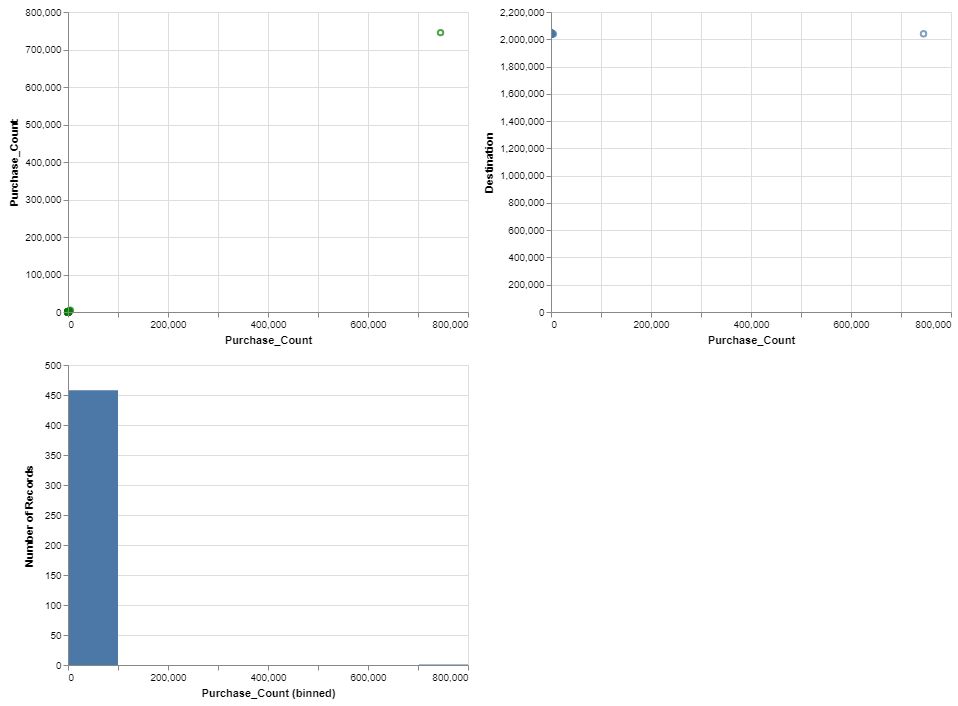

In [172]:
(scatter | scatter2) & histogram

In [142]:
((scatter | scatter2) & histogram).save('purchase_data_with_gail.html')

In [143]:
purchase_data.tail()

,Unnamed: 0,Destination,Purchase_Count,Destination_Names
454,2,2037744,1902,Miesha Lettsome
455,1,2040624,2385,Torri Devilliers
456,3,2038155,2590,Brandon Bradley
457,5,2040339,4798,Fairy Boratko
458,0,2040565,745027,Gail Feindt


In [144]:
no_gail =purchase_data.drop(458)

In [145]:
no_gail.tail()

,Unnamed: 0,Destination,Purchase_Count,Destination_Names
453,6,2037694,990,Ernest Patterson
454,2,2037744,1902,Miesha Lettsome
455,1,2040624,2385,Torri Devilliers
456,3,2038155,2590,Brandon Bradley
457,5,2040339,4798,Fairy Boratko


In [150]:
interval = alt.selection_interval()
scatter = alt.Chart(no_gail).mark_point().encode(
    y='Purchase_Count',
    x='Purchase_Count',
    color=alt.condition(interval,alt.value('green'), alt.value('blue'))
).interactive().properties(selection=interval)

In [151]:

histogram= alt.Chart(no_gail).mark_bar().encode(
    y='count()',
    x=alt.X('Purchase_Count',bin=True)
).interactive().transform_filter(
    interval
)

In [167]:
scatter2 = alt.Chart(no_gail).mark_point().encode(
    y='Purchase_Count',
    x='Purchase_Count',
    tooltip='Destination_Names'
).interactive().transform_filter(
    interval
)

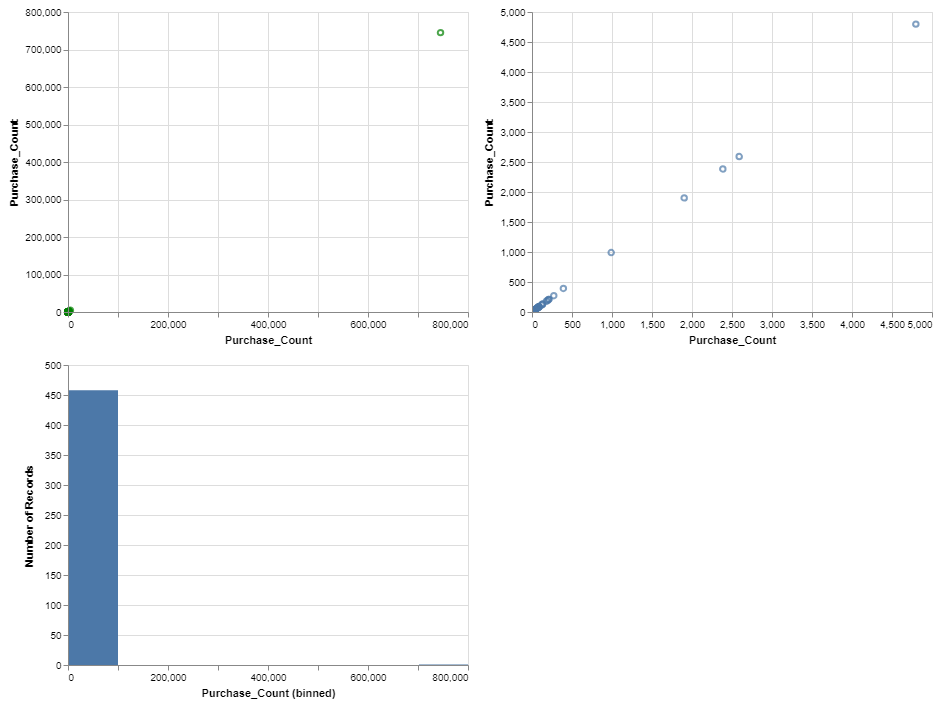

In [168]:
(scatter | scatter2) & histogram

In [21]:
data_freq = pd.read_csv('data_described_frequency.csv')

In [22]:
data_freq.head()
data_freq.columns

Index(['Unnamed: 0', 'month_yr_freq_calls', 'month_yr_freq_emails',
       'month_yr_freq_purchases', 'month_yr_freq_meetings'],
      dtype='object')

In [23]:
data_freq.rename(columns={'Unnamed: 0':'month_yr'}, inplace=True)

In [25]:
data_freq.columns

Index(['month_yr', 'month_yr_freq_calls', 'month_yr_freq_emails',
       'month_yr_freq_purchases', 'month_yr_freq_meetings'],
      dtype='object')

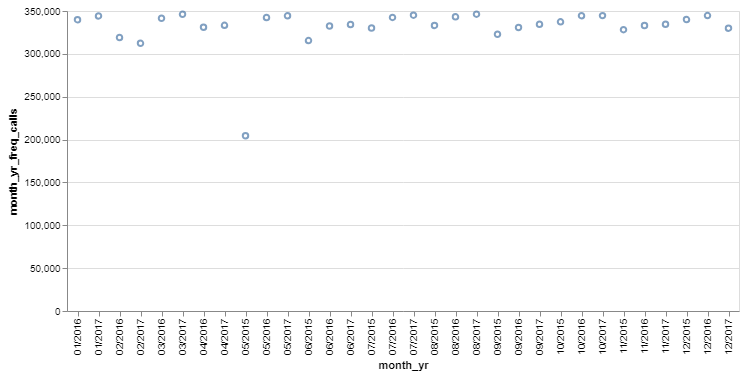

In [34]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_calls',
    x='month_yr',
)

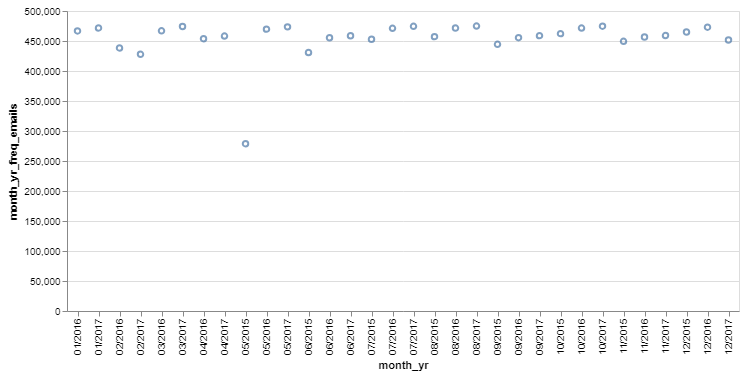

In [35]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_emails',
    x='month_yr',
)

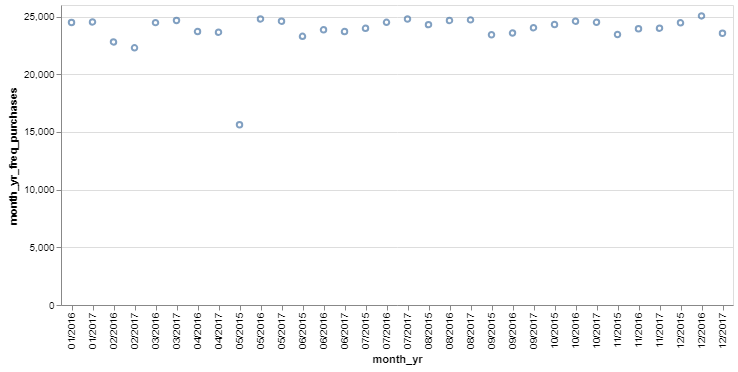

In [36]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_purchases',
    x='month_yr',
)

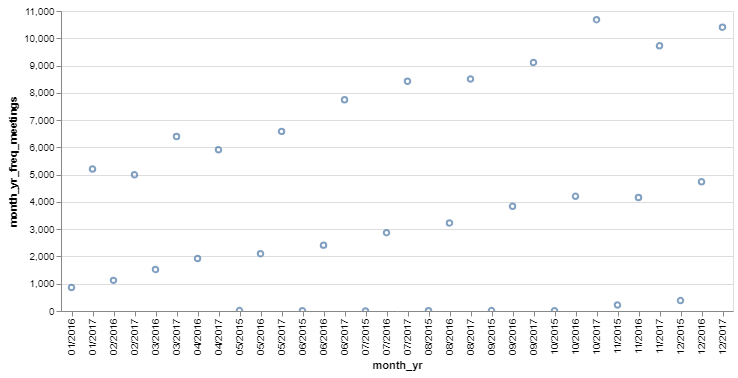

In [40]:
alt.Chart(data_freq).mark_point().encode(
    y='month_yr_freq_meetings',
    x='month_yr',
    tooltip=['month_yr_freq_meetings']
).interactive()

In [43]:

data_freq2 = pd.read_csv('data_described_frequency_v2.csv')

In [44]:
data_freq2.head()

,Unnamed: 0,data_frequency,month_yr,data_type
0,0,346272,08/2017,calls
1,1,346099,03/2017,calls
2,2,345150,07/2017,calls
3,3,344694,12/2016,calls
4,4,344610,10/2017,calls


data_frequency month_yr data_type

In [55]:
chart = alt.Chart(data_freq2).mark_point().encode(
    y='data_frequency',
    x='month_yr',
    color='data_type',
    tooltip=['data_type', 'data_frequency']
).interactive()



In [59]:
combined_chart = (chart.properties(selection=interval) | chart.transform_filter(interval))

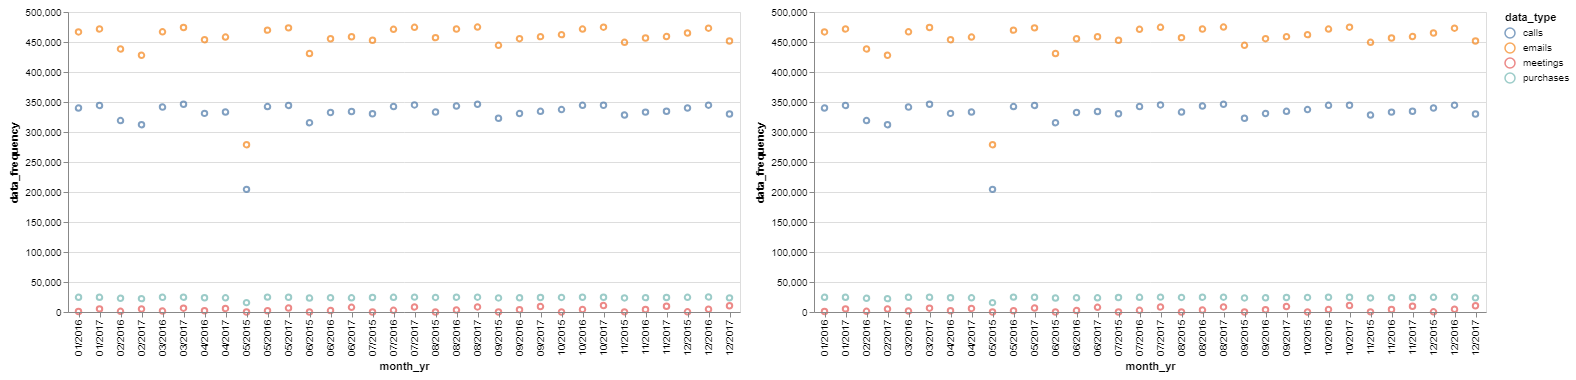

In [60]:
combined_chart

In [61]:
combined_chart.save('frequency_data.html')

In [64]:
histogram= alt.Chart(data_freq2).mark_bar().encode(
    y='data_frequency',
    x='month_yr',
    color='data_type',
    column='data_type'
).interactive()

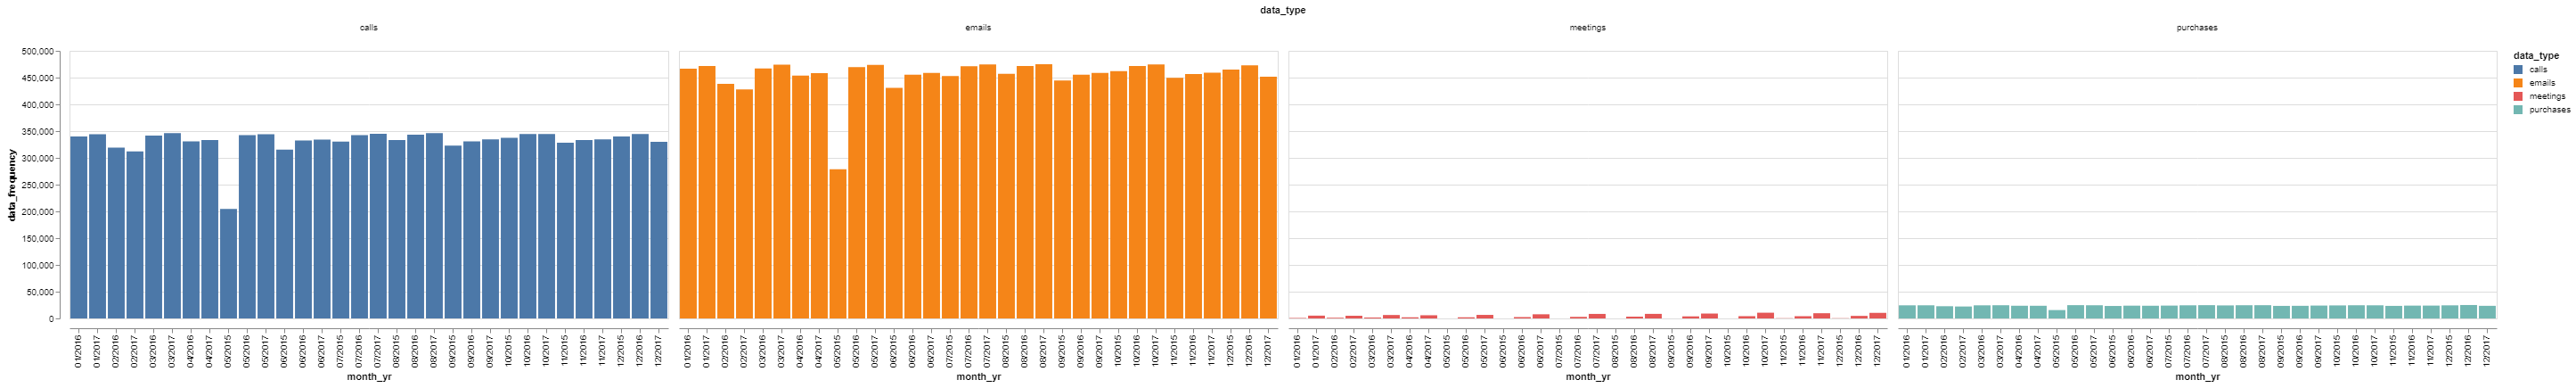

In [65]:
histogram

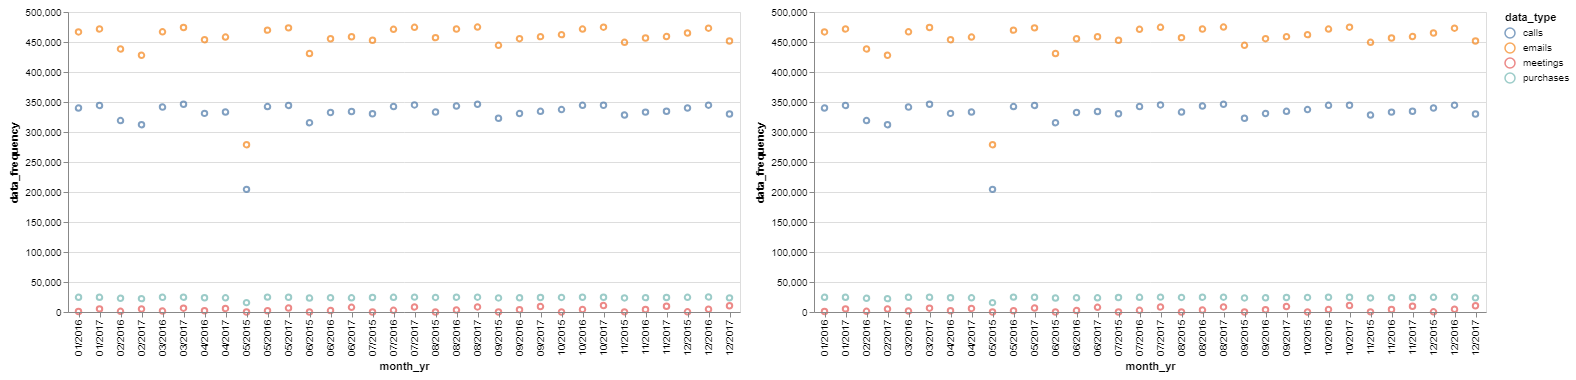

In [68]:
(chart.properties(selection=interval) | chart.transform_filter(interval))

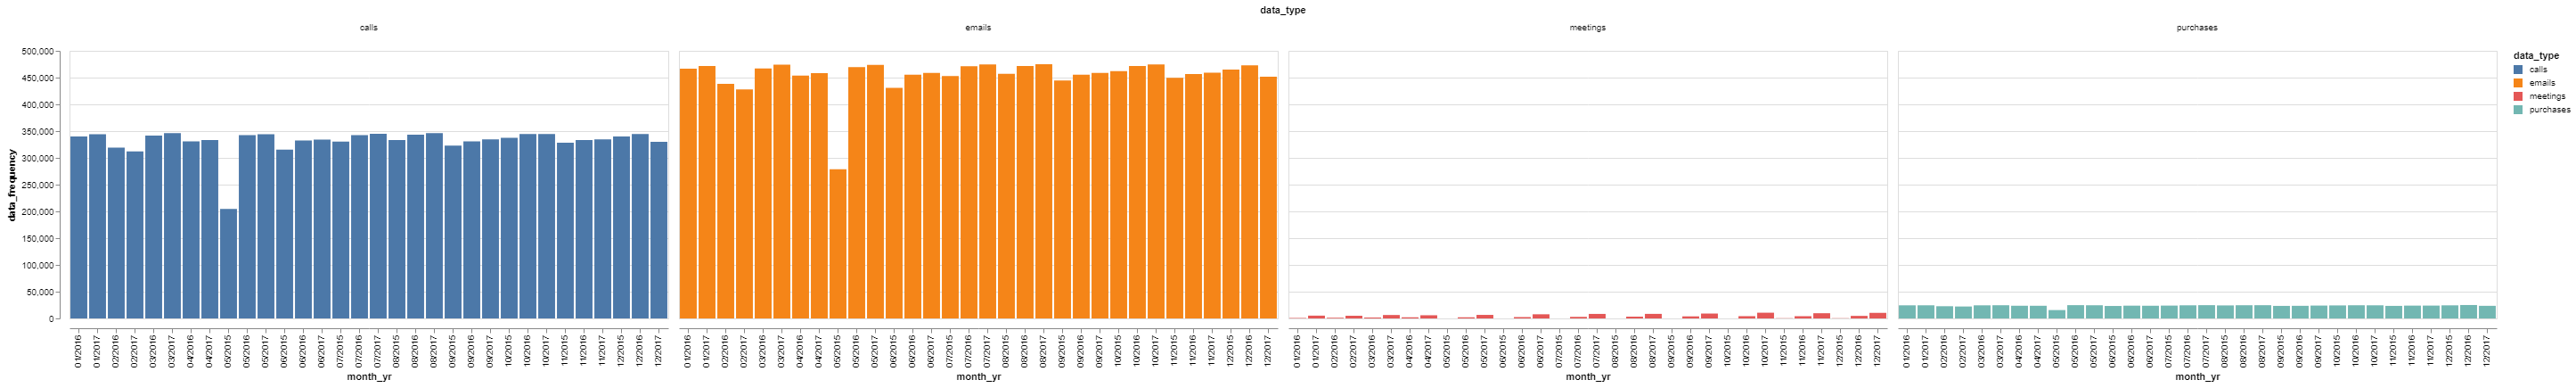

In [69]:
histogram

In [76]:
interval = alt.selection_interval()

In [97]:
hist2 = alt.Chart(data_freq2).mark_bar().encode(
    y='data_frequency',
    x='month_yr',
    color='data_type'
).interactive()

In [98]:
interactive_frequnecy_charts = (chart.properties(selection=interval) | chart.transform_filter(interval)) & hist2.transform_filter(interval)

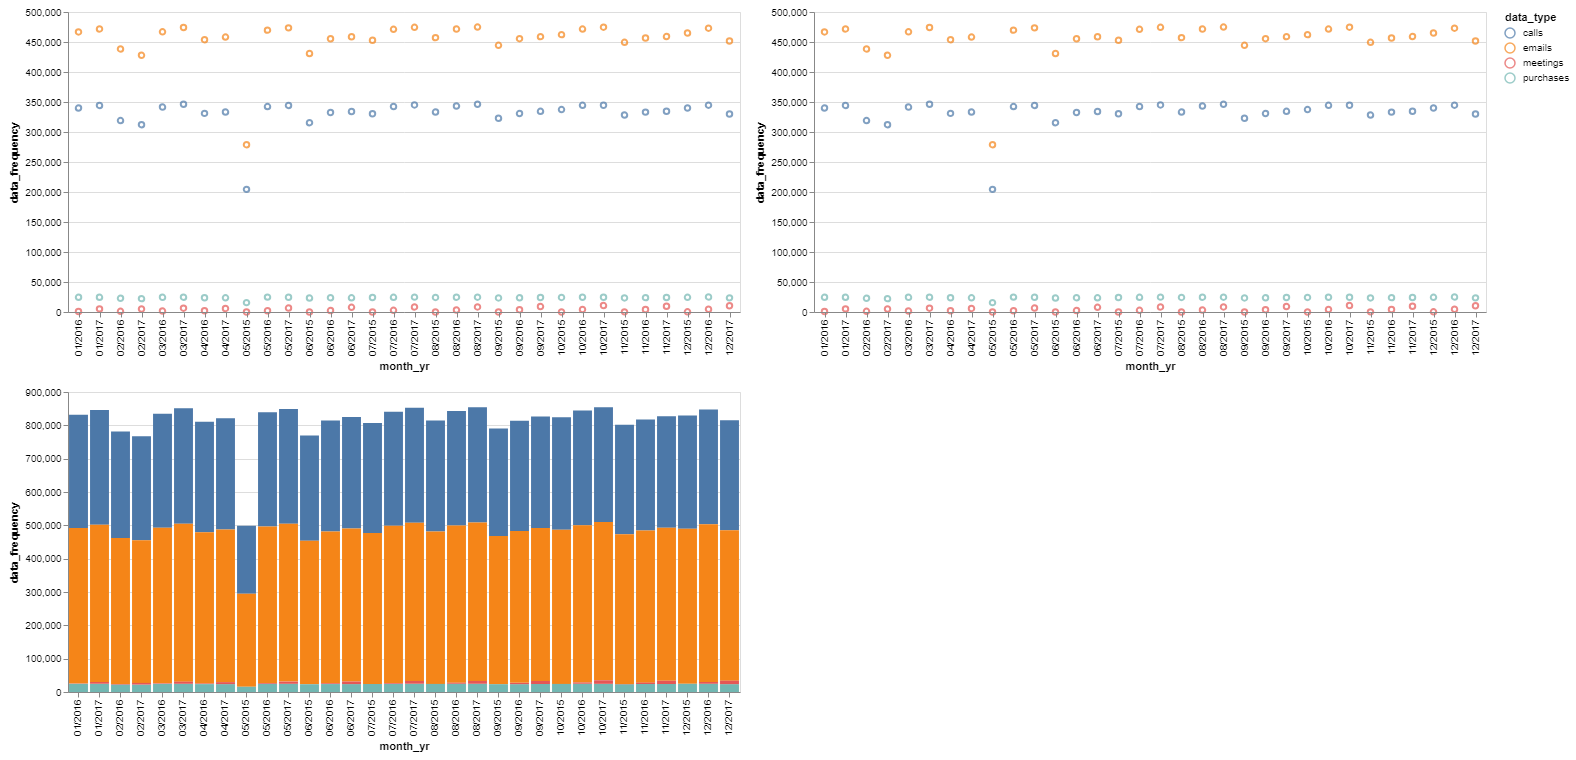

In [99]:
interactive_frequnecy_charts

In [82]:
interactive_frequnecy_charts.save('interactive_frequency_charts.html')